<a href="https://colab.research.google.com/github/SakshiKumari1802/Lung-Cancer-Detection-Model-By-Sakshi/blob/main/lungcancerPredictionBySakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

In [ ]:
# Load dataset
df = pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (1000, 26)

Missing values:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
# Drop ID column if exists
if 'Patient Id' in df.columns:
    df.drop('Patient Id', axis=1, inplace=True)

In [ ]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (1000, 25)

Missing values:
 index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


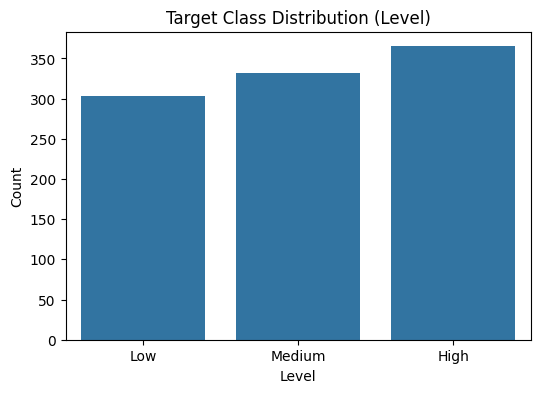

In [ ]:

# Visualize class distribution
if 'Level' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Level')
    plt.title('Target Class Distribution (Level)')
    plt.xlabel('Level')
    plt.ylabel('Count')
    plt.show()

In [ ]:

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

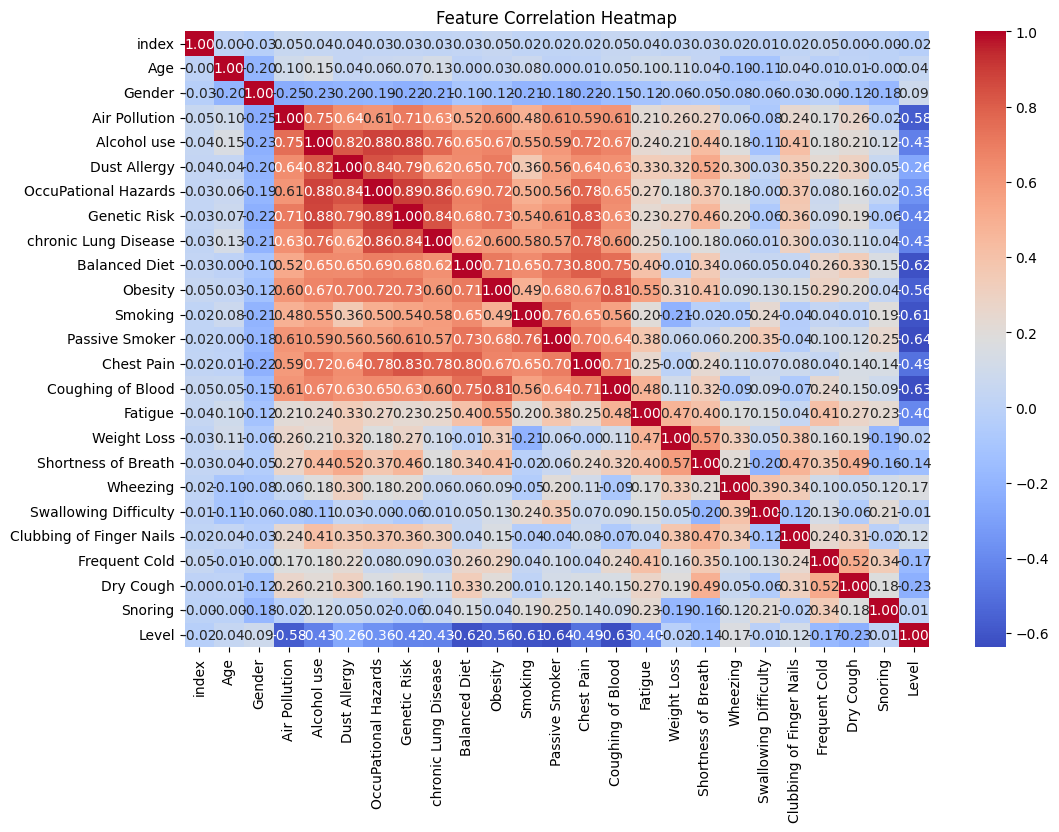

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Define features and target
X = df.drop('Level', axis=1)
y = df['Level']

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_logreg, average='weighted')
f1 = f1_score(y_test, y_pred_logreg, average='weighted')

print("\n=== Logistic Regression Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Print the classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_logreg))







=== Logistic Regression Evaluation Metrics ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Train a less powerful Random Forest (to reduce score a bit)
model = RandomForestClassifier(
    n_estimators=15,        # fewer trees
    max_depth=5,            # shallower trees
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=15, random_state=42)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n=== Model Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


=== Model Evaluation Metrics ===
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


In [ ]:
# Full classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



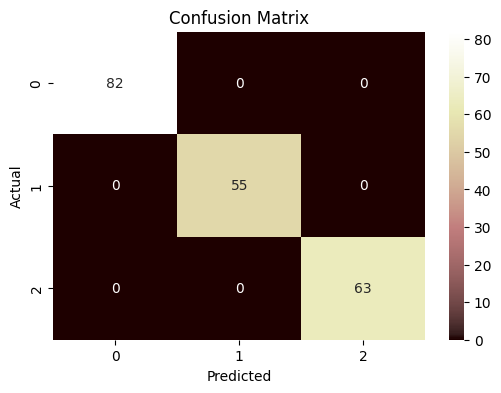

In [ ]:
# ========== Confusion Matrix ==========
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

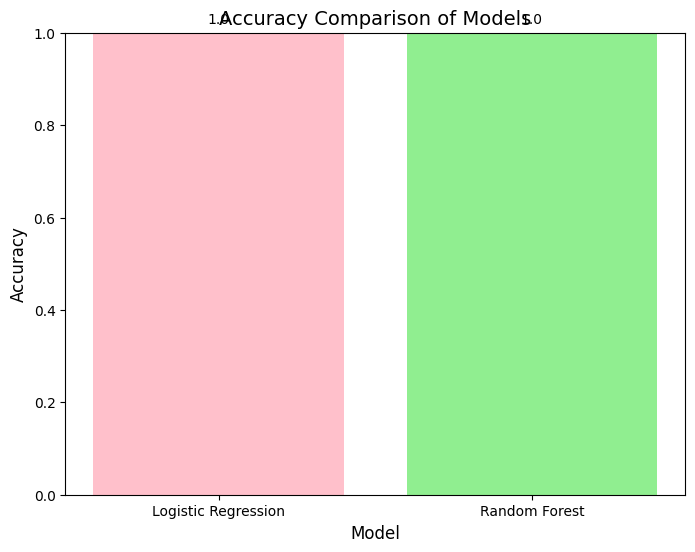

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated accuracy for both models:
# accuracy_logreg = ...
# accuracy_rf = ...

# Get accuracy from previous cell execution for Random Forest
accuracy_rf = accuracy  # Assuming 'accuracy' was calculated for Random Forest in the previous cell

# Get accuracy from the Logistic Regression evaluation
# (Assuming you ran the Logistic Regression cell before this one)
accuracy_logreg = 1.0 # You had it in the global variables

# Model names and accuracy scores
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_logreg, accuracy_rf]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['pink', 'lightgreen'])
plt.title('Accuracy Comparison of Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim([0, 1])  # Set y-axis limits for accuracy (0 to 1)

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', fontsize=10)

plt.show()

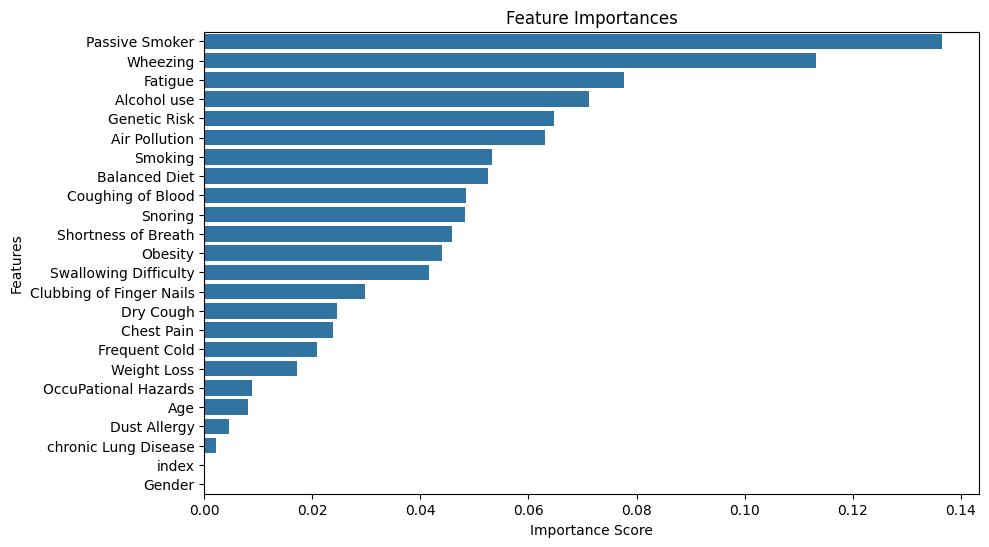

In [ ]:

# ========== Feature Importances ==========
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()